# Imports and Helper Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
# input is matrix and index
# output is the column
def col(data, index):
    return [row[index] for row in data]

# Unit Sphere Data Generation

In [3]:
# the input is the size of the data to be generated
# the output is an array of arrays which contains
# the data in form [bias, x, y, z, classification]
def gen3DdataUnitSphere(number):
    data = []
    
    # create data with no classifcation
    for i in range(number):
        data.append([1, np.random.uniform(-1.5, 1.5), \
                     np.random.uniform(-1.5, 1.5), \
                     np.random.uniform(-1.5, 1.5), 0])
    
    for j in data:
        # classify as 1 if inside the sphere
        # x^2 + y^2 + z^2 = 1
        if j[1]**2 + j[2]**2 + j[3]**2 < 1:
            j[4] = 1
        else:
            j[4] = -1
    return data

# Plot Unit Sphere

In [4]:
# input is nothing
# output is a bunch of points to visualize the graph 
# of the unit sphere
def outputUnitSphere():
    # create points on the unit circle
    vec = np.random.randn(3, 5000)
    vec /= np.linalg.norm(vec, axis=0)       
    return vec

<function matplotlib.pyplot.show(*args, **kw)>

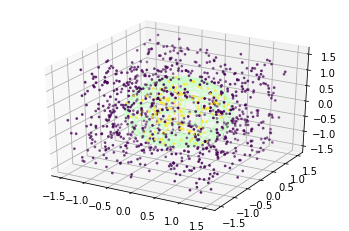

In [5]:
# create figure
fig = fig = plt.figure()
ax = plt.axes(projection='3d')

# get data and unit sphere points
x, y, z = outputUnitSphere()
data = gen3DdataUnitSphere(1000)

# plot data as scatter plot
ax.scatter(col(data, 1), col(data, 2), col(data, 3), \
           c=col(data, 4), s = np.pi)

# plot unitsphere wireframe
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color=(0.8, 1, 0.8))

plt.show
# we can see the general shape but hard to tell

# Output Unit Sphere Data

In [6]:
# outputs the data and sphere to filename
def outputUnitSpherePoints(data, sphere, filename):
    # open the filename for writing
    with open(filename, mode = 'w', newline='') as f:
        data_writer = csv.writer(f)
        data_writer.writerow(['x_coords', 'y_coords', 'z_coords', 'type'])
        # X Y Z Classification (-1, 1, or 0 for plane)
        # add data
        for line in data:
            data_writer.writerow([line[1], line[2], line[3], line[4]])
        # add sphere data
        x, y, z = sphere
        for index in range(len(x)):
            data_writer.writerow([x[index], y[index], z[index], 0])

In [7]:
outputUnitSpherePoints(gen3DdataUnitSphere(1000), outputUnitSphere(), "Data/UnitSphereData.csv")

# Curved Surface Data Generation

In [6]:
# the input is the size of the data to be generated
# the output is an array of arrays which contains
# the data in form [bias, x, y, z, classification]
def gen3DdataSurface(number):
    data = []
    
    # create data with no classifcation
    for i in range(number):
        data.append([1, np.random.uniform(-4, 4), \
                     np.random.uniform(-4, 4), \
                     np.random.uniform(-1, 1), 0])
    for j in data:
        # classify as above or below surface
        if np.sin(np.sqrt(j[1]**2 + j[2]**2)) > j[3]:
            j[4] = 1
        else:
            j[4] = -1
            
    return data

# Surface Plot

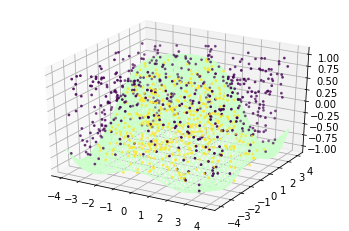

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X, Y = np.mgrid[-4:4:100j, -4:4:100j]
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
ax.plot_wireframe(X, Y, Z, color=(0.8, 1, 0.8))

data = gen3DdataSurface(1000)
ax.scatter(col(data, 1), col(data, 2), col(data, 3), \
           c=col(data, 4), s = np.pi)

plt.show()

# can tell shape but kinda hard to tell

# Output Surface Data

In [11]:
# outputs the surface data
def outputSurface():
    # make data
    X, Y = np.mgrid[-4:4:100j, -4:4:100j]
    R = np.sqrt(X**2 + Y**2)
    Z = np.sin(R)
    
    # make data csv ready for Virtualitics
    x, y, z = [], [], []
    for i in range(len(X)):
        for j in range(len(Y)):
            x.append(X[i][j])
            y.append(Y[i][j])
            z.append(Z[i][j])
    return [x, y, z]

In [12]:
# outputs the data and surface to filename
def outputSurfacePoints(data, surface, filename):
    # open the filename for writing
    with open(filename, mode = 'w', newline='') as f:
        data_writer = csv.writer(f)
        data_writer.writerow(['x_coords', 'y_coords', 'z_coords', 'type'])
        # X Y Z Classification (-1, 1, or 0 for plane)
        # add data
        for line in data:
            data_writer.writerow([line[1], line[2], line[3], line[4]])
        # add surface data
        x, y, z = surface
        for index in range(len(x)):
            data_writer.writerow([x[index], y[index], z[index], 0])

In [13]:
outputSurfacePoints(gen3DdataSurface(1000), outputSurface(), "Data/SurfaceData.csv")